In [87]:
import yfinance as yf

In [88]:
gold_ticker = yf.Ticker("NQ=F")

df = gold_ticker.history(period="1mo", interval='1h')

df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)

df.shape

(494, 4)

In [89]:
# df['is_swing_high'] = df['High'].rolling(window=3).apply(lambda x: x.iloc[1] > max(x.iloc[0], x.iloc[2]))
# df['is_swing_low'] = df['High'].rolling(window=3).apply(lambda x: x.iloc[1] < min(x.iloc[0], x.iloc[2]))

# swing_filter = (df['is_swing_high'] == 1.0) | (df['is_swing_low'] == 1.0)

# plottable = df[swing_filter].apply(lambda row: row['High'] if row['is_swing_high'] else row['Low'], axis=1).to_frame('Swings')

# plottable.plot(figsize=(20, 5))

<Axes: xlabel='Datetime'>

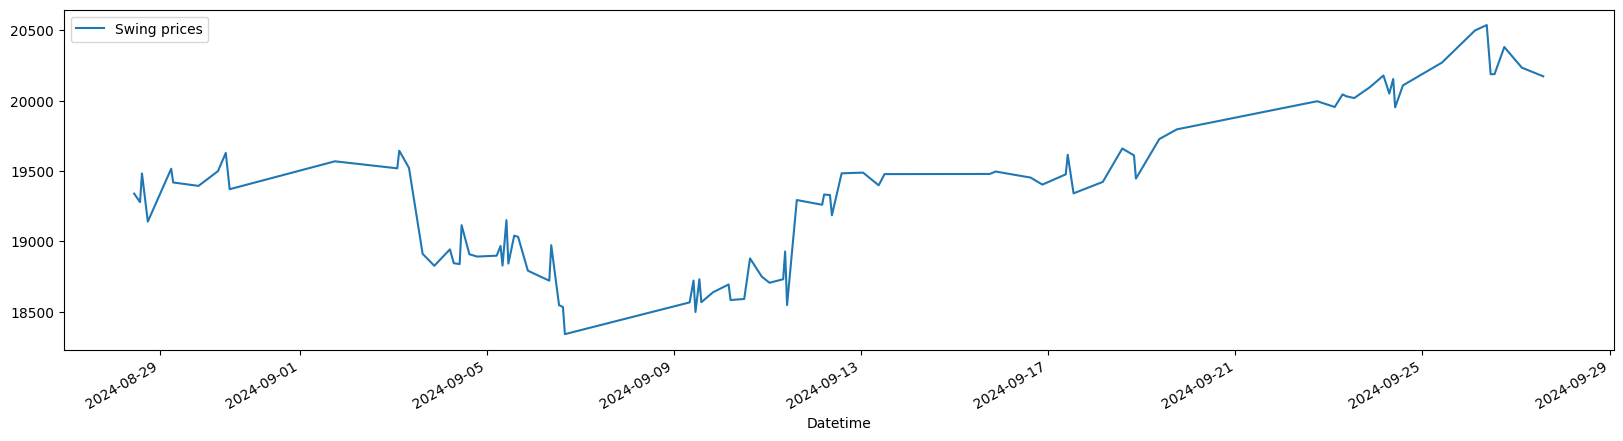

In [90]:
DIFF = 10

df['is_swing_high'] = (df['High'].shift(1) + DIFF < df['High']) & (df['High'].shift(-1) + DIFF < df['High'])
df['is_swing_low'] = (df['Low'].shift(1) - DIFF > df['Low']) & (df['Low'].shift(-1) - DIFF > df['Low'])

# swing_price_df = df[df['is_swing_high'] | df['is_swing_low']]
swing_price_df = df[df['is_swing_high'] | df['is_swing_low']].apply(lambda row: row['High'] if row['is_swing_high'] else row['Low'], axis=1).to_frame('Swing prices')

swing_price_df.plot(figsize=(20, 5))